In [140]:
## import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics


In [141]:
## load the dataset
df = pd.read_csv('titanic.csv')
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [142]:
df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [143]:
corr_matrix = df.corr()
corr_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.020370,-0.038354,0.028814,-0.055224,0.008942,0.031428
Survived,-0.020370,1.000000,-0.264710,-0.053695,0.002370,0.108919,0.233622
Pclass,-0.038354,-0.264710,1.000000,-0.408106,0.060832,0.018322,-0.558629
Age,0.028814,-0.053695,-0.408106,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,0.002370,0.060832,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.108919,0.018322,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,0.233622,-0.558629,0.178740,0.160238,0.221539,1.000000


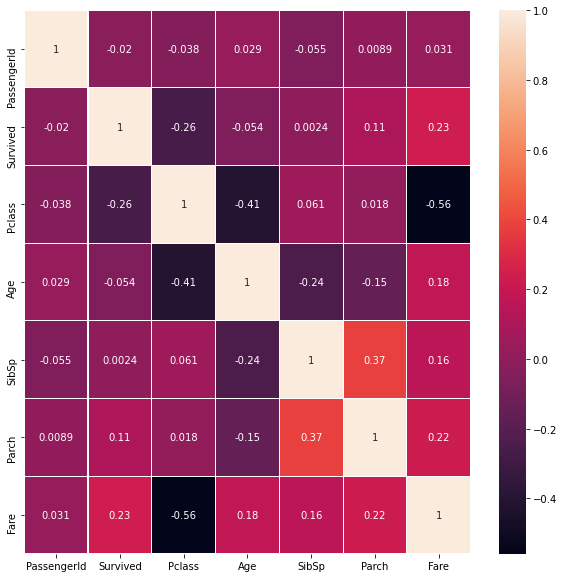

In [144]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix,annot=True,linewidths=0.1)

In [145]:
df = df.drop(columns=['PassengerId','Name','Ticket','Cabin'])
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
1304,0,3,male,NaN,0,0,8.0500,S
1305,1,1,female,39.0,0,0,108.9000,C
1306,0,3,male,38.5,0,0,7.2500,S
1307,0,3,male,NaN,0,0,8.0500,S


In [146]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      2
dtype: int64

In [147]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [148]:
print('Percent of missing "Age" records is %.2f%%' %((df['Age'].isnull().sum()/df.shape[0])*100))

Percent of missing "Age" records is 20.09%


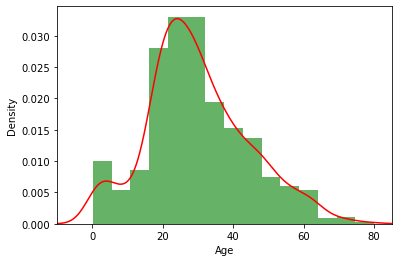

In [149]:
ax = df["Age"].hist(bins=15, density=True, stacked=True, color='green', alpha=0.6)
df["Age"].plot(kind='density', color='red')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

In [150]:
# mean age
print('The mean of "Age" is %.2f' %(df["Age"].mean(skipna=True)))
# median age
print('The median of "Age" is %.2f' %(df["Age"].median(skipna=True)))

The mean of "Age" is 29.88
The median of "Age" is 28.00


In [151]:
# percent of missing "Embarked" 
print('Percent of missing "Embarked" records is %.2f%%' %((df['Embarked'].isnull().sum()/df.shape[0])*100))

Percent of missing "Embarked" records is 0.15%


Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):
S    914
C    270
Q    123
Name: Embarked, dtype: int64


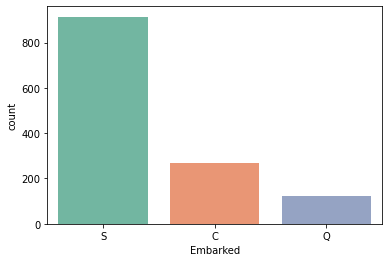

In [152]:
print('Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):')
print(df['Embarked'].value_counts())
sns.countplot(x='Embarked', data=df, palette='Set2')
plt.show()

In [153]:
train_data = df.copy()
train_data["Age"].fillna(df["Age"].median(skipna=True), inplace=True)
train_data["Embarked"].fillna(df['Embarked'].value_counts().idxmax(), inplace=True)


In [154]:
train_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [155]:
print('Percent of missing "Fare" records is %.2f%%' %((df['Fare'].isnull().sum()/df.shape[0])*100))

Percent of missing "Fare" records is 0.08%


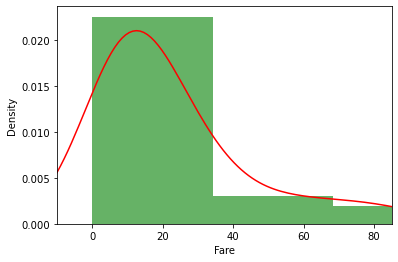

In [156]:
bx = df["Fare"].hist(bins=15, density=True, stacked=True, color='green', alpha=0.6)
df["Fare"].plot(kind='density', color='red')
bx.set(xlabel='Fare')
plt.xlim(-10,85)
plt.show()

In [157]:
# mean fare
print('The mean of "Fare" is %.2f' %(df["Fare"].mean(skipna=True)))
# median fare
print('The median of "Fare" is %.2f' %(df["Fare"].median(skipna=True)))

The mean of "Fare" is 33.30
The median of "Fare" is 14.45


In [158]:
train_data["Fare"].fillna(df["Fare"].median(skipna=True), inplace=True)

In [159]:
train_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [160]:
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
1304,0,3,male,28.0,0,0,8.0500,S
1305,1,1,female,39.0,0,0,108.9000,C
1306,0,3,male,38.5,0,0,7.2500,S
1307,0,3,male,28.0,0,0,8.0500,S


In [161]:
training=pd.get_dummies(train_data, columns=["Pclass","Embarked","Sex"])
dffinal = training
dffinal

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,22.0,1,0,7.2500,0,0,1,0,0,1,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,0,1,0
2,1,26.0,0,0,7.9250,0,0,1,0,0,1,1,0
3,1,35.0,1,0,53.1000,1,0,0,0,0,1,1,0
4,0,35.0,0,0,8.0500,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0,28.0,0,0,8.0500,0,0,1,0,0,1,0,1
1305,1,39.0,0,0,108.9000,1,0,0,1,0,0,1,0
1306,0,38.5,0,0,7.2500,0,0,1,0,0,1,0,1
1307,0,28.0,0,0,8.0500,0,0,1,0,0,1,0,1


In [162]:
corr_matrix = dffinal.corr()
corr_matrix

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
Survived,1.000000,-0.043286,0.002370,0.108919,0.233773,0.234338,0.048091,-0.242183,0.121156,0.040950,-0.133020,0.688371,-0.688371
Age,-0.043286,1.000000,-0.189972,-0.125851,0.178182,0.368659,-0.003354,-0.316233,0.075016,-0.031132,-0.046404,-0.053663,0.053663
SibSp,0.002370,-0.189972,1.000000,0.373587,0.160349,-0.034256,-0.052419,0.072610,-0.048396,-0.048678,0.073709,0.109609,-0.109609
Parch,0.108919,-0.125851,0.373587,1.000000,0.221635,-0.013033,-0.010057,0.019521,-0.008635,-0.100943,0.071881,0.213125,-0.213125
Fare,0.233773,0.178182,0.160349,0.221635,1.000000,0.600085,-0.121222,-0.419851,0.286368,-0.129958,-0.170068,0.185681,-0.185681
Pclass_1,0.234338,0.368659,-0.034256,-0.013033,0.600085,1.000000,-0.296526,-0.622172,0.325722,-0.166101,-0.181800,0.107371,-0.107371
Pclass_2,0.048091,-0.003354,-0.052419,-0.010057,-0.121222,-0.296526,1.000000,-0.563180,-0.134675,-0.121973,0.196532,0.028862,-0.028862
Pclass_3,-0.242183,-0.316233,0.072610,0.019521,-0.419851,-0.622172,-0.563180,1.000000,-0.171430,0.243706,-0.003805,-0.116562,0.116562
Embarked_C,0.121156,0.075016,-0.048396,-0.008635,0.286368,0.325722,-0.134675,-0.171430,1.000000,-0.164166,-0.778262,0.066564,-0.066564
Embarked_Q,0.040950,-0.031132,-0.048678,-0.100943,-0.129958,-0.166101,-0.121973,0.243706,-0.164166,1.000000,-0.491656,0.088651,-0.088651


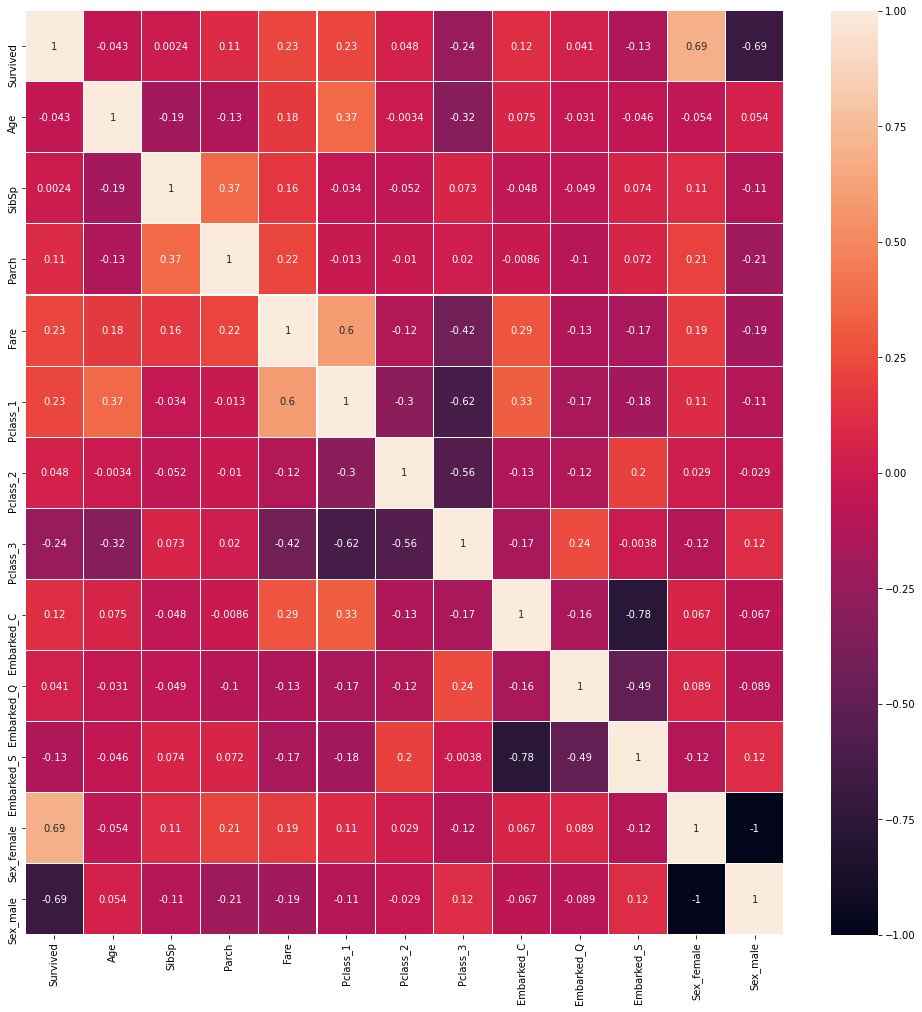

In [163]:
plt.figure(figsize=(17, 17))
sns.heatmap(corr_matrix,annot=True,linewidths=0.1)

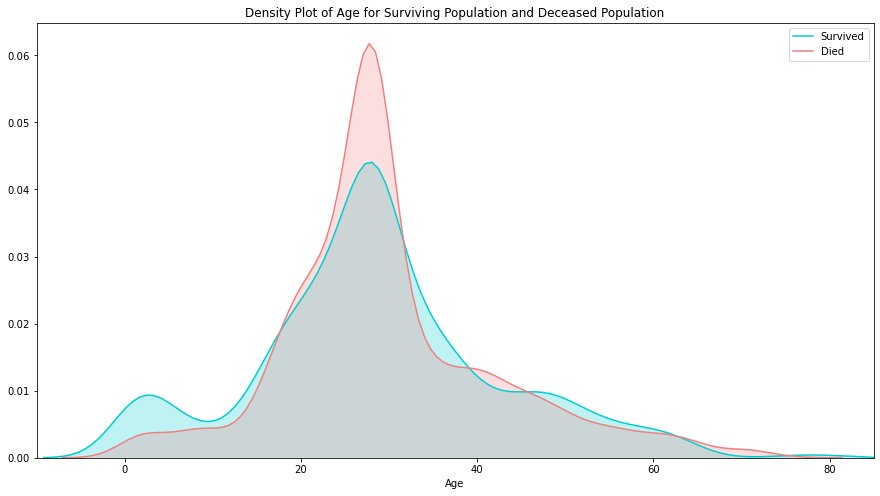

In [164]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(dffinal["Age"][dffinal.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(dffinal["Age"][dffinal.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

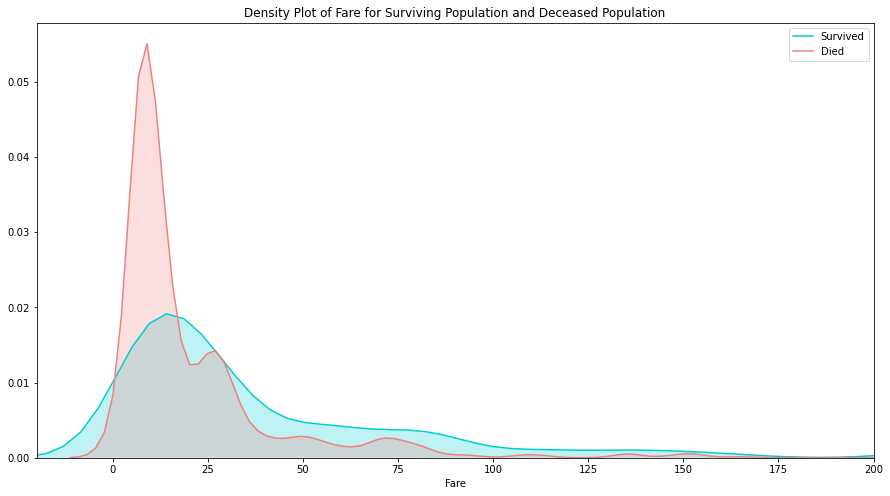

In [165]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(dffinal["Fare"][dffinal.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(dffinal["Fare"][dffinal.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
ax.set(xlabel='Fare')
plt.xlim(-20,200)
plt.show()

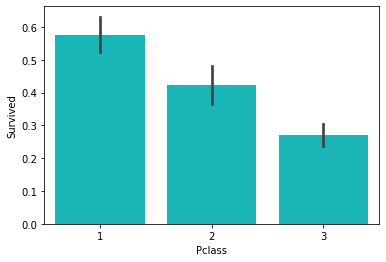

In [166]:
sns.barplot('Pclass', 'Survived', data=df, color="darkturquoise")
plt.show()

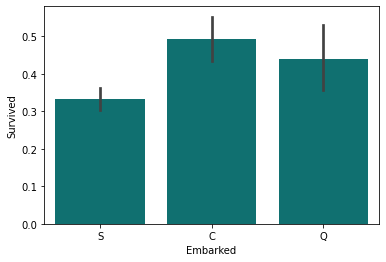

In [167]:
sns.barplot('Embarked', 'Survived', data=df, color="teal")
plt.show()

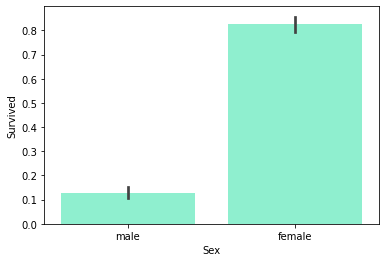

In [168]:
sns.barplot('Sex', 'Survived', data=df, color="aquamarine")
plt.show()

In [169]:
dffinal

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,22.0,1,0,7.2500,0,0,1,0,0,1,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,0,1,0
2,1,26.0,0,0,7.9250,0,0,1,0,0,1,1,0
3,1,35.0,1,0,53.1000,1,0,0,0,0,1,1,0
4,0,35.0,0,0,8.0500,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0,28.0,0,0,8.0500,0,0,1,0,0,1,0,1
1305,1,39.0,0,0,108.9000,1,0,0,1,0,0,1,0
1306,0,38.5,0,0,7.2500,0,0,1,0,0,1,0,1
1307,0,28.0,0,0,8.0500,0,0,1,0,0,1,0,1


In [170]:
# split the data into independent and dependent variable    ##classsification
from sklearn.model_selection import train_test_split
X = dffinal.iloc[:, 1:13].values  ##  same as X = df.iloc[:, 0:3002].values
y = dffinal.iloc[:, 0].values
X

array([[22. ,  1. ,  0. , ...,  1. ,  0. ,  1. ],
       [38. ,  1. ,  0. , ...,  0. ,  1. ,  0. ],
       [26. ,  0. ,  0. , ...,  1. ,  1. ,  0. ],
       ...,
       [38.5,  0. ,  0. , ...,  1. ,  0. ,  1. ],
       [28. ,  0. ,  0. , ...,  1. ,  0. ,  1. ],
       [28. ,  1. ,  1. , ...,  0. ,  0. ,  1. ]])

In [171]:
## split the data into trainig and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.32, random_state = 32)

In [172]:
## train the LOGISTIC REGRESSION
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)

c:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [173]:
## make the prediction
pred_LR = model_LR.predict(X_test) 
pd.DataFrame({'Actual': y_test, 'Prediction': pred_LR})

,Actual,Prediction
0,0,0
1,0,0
2,1,1
3,0,0
4,0,1
...,...,...
414,0,0
415,1,1
416,0,0
417,0,0


In [174]:
## evaluate the model accuracy
accuracy_LR =accuracy_score(y_test, pred_LR)
## confusion metrics
conf_mat = confusion_matrix(y_test, pred_LR)
print(accuracy_LR)
print(conf_mat)

0.8448687350835322
[[229  25]
 [ 40 125]]


In [175]:
## MAE mean ABS error
## MSE square error (average of the square of differences, lower-better)
## RMSE
## R2 (measure of variations/changes of the target value, 0 o 1, higher is better)

print('MAE:', metrics.mean_absolute_error(y_test, pred_LR))
print('MSE:', metrics.mean_squared_error(y_test, pred_LR))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_LR)))
print('R2:', metrics.r2_score(y_test, pred_LR))

MAE: 0.15513126491646778
MSE: 0.15513126491646778
RMSE: 0.39386706503142377
R2: 0.35015509424958224


In [176]:
# naive bayes
from sklearn.naive_bayes import GaussianNB
model_NB = GaussianNB()
model_NB.fit(X_train, y_train)

GaussianNB()

In [177]:
#predit the test set
y_pred_NB = model_NB.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Prediction': y_pred_NB})

,Actual,Prediction
0,0,0
1,0,0
2,1,1
3,0,0
4,0,1
...,...,...
414,0,0
415,1,1
416,0,0
417,0,0


In [178]:
accuracy_NB = accuracy_score(y_test,y_pred_NB)
conf_mat_NB = confusion_matrix(y_test,y_pred_NB)
print(accuracy_NB)
print(conf_mat_NB)

0.8329355608591885
[[220  34]
 [ 36 129]]


In [179]:
## MAE mean ABS error
## MSE square error (average of the square of differences, lower-better)
## RMSE
## R2 (measure of variations/changes of the target value, 0 o 1, higher is better)

print('MAE:', metrics.mean_absolute_error(y_test, y_pred_NB))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_NB))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_NB)))
print('R2:', metrics.r2_score(y_test, y_pred_NB))

MAE: 0.16706443914081145
MSE: 0.16706443914081145
RMSE: 0.4087351699337989
R2: 0.30016702457647326
